# Enriching Shooting Data

Goal: Visualize every shot a player takes during a single game with information on the closest defender
Steps:

1. Merge Advanced Shot Log with Shot Chart
2. Scatter plot each shot
3. Add ring to each shot using the distance of nearest defender as radius
4. Shade in each ring to represent in-your-face to WTFO
5. Change shape of each shot to represent Make/Miss
6. Funtionalize the whole process so that it takes a playerID and GameID as arguments and returns a chart with titles

In [1]:
# Getting Basic Data
import goldsberry
import pandas as pd
pd.set_option("display.max_columns", 50)
pd.options.mode.chained_assignment = None 
goldsberry.__version__

'0.6.3.1'

In [2]:
# Getting Players List
players_2014 = goldsberry.PlayerList(2014)
players_2014 = pd.DataFrame(players_2014)

In [3]:
#Getting Shot Data for James Harden
harden_id = players_2014['PERSON_ID'].ix[players_2014['DISPLAY_LAST_COMMA_FIRST'].str.contains("Harden")].tolist()[0]
#XY Shot Charts
harden_shots = goldsberry.player.shot_chart(harden_id, season=2014, clutchtime=8, rangetype=0)
harden_shots = pd.DataFrame(harden_shots.chart())

#SportVU Shot Data
harden_shots_advanced = goldsberry.player.shot_log(harden_id)
harden_shots_advanced = pd.DataFrame(harden_shots_advanced.log())
#Append PLAYER_ID to each shot_chart_advanced
harden_shots_advanced['PLAYER_ID'] = harden_id

In [4]:
#Sort XY Shots and Assign a Shot Number
#ShotNumber will be used to merge the two datasets.
harden_shots.sort(['GAME_ID', 'GAME_EVENT_ID'], inplace=True)
harden_shots['SHOT_NUMBER'] = harden_shots.groupby(['GAME_ID', 'PLAYER_ID'])['GAME_EVENT_ID'].cumcount()+1

In [5]:
#Merge data into a single dataframe
harden_shots_full = pd.merge(harden_shots, harden_shots_advanced, on=['GAME_ID', 'SHOT_NUMBER'], how='left')

In [9]:
harden_shots_full.head()

,ACTION_TYPE,EVENT_TYPE,GAME_EVENT_ID,GAME_ID,GRID_TYPE,LOC_X,LOC_Y,MINUTES_REMAINING,PERIOD_x,PLAYER_ID_x,PLAYER_NAME,SECONDS_REMAINING,SHOT_ATTEMPTED_FLAG,SHOT_DISTANCE,SHOT_MADE_FLAG,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_ID,TEAM_NAME,SHOT_NUMBER,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FGM,FINAL_MARGIN,GAME_CLOCK,LOCATION,MATCHUP,PERIOD_y,PTS,PTS_TYPE,SHOT_CLOCK,SHOT_DIST,SHOT_RESULT,TOUCH_TIME,W,PLAYER_ID_y
0,Jump Shot,Missed Shot,18,0021400003,Shot Chart Detail,226,39,9,1,201935,James Harden,58,1,22,0,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,1610612745,Houston Rockets,1,"Hill, Jordan",201941,6.6,0,0,18,10:02,A,"OCT 28, 2014 - HOU @ LAL",1,0,3,19.7,22.9,missed,1.2,W,201935
1,Layup Shot,Missed Shot,39,0021400003,Shot Chart Detail,-15,15,8,1,201935,James Harden,25,1,2,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612745,Houston Rockets,2,"Hill, Jordan",201941,0.5,2,0,18,8:29,A,"OCT 28, 2014 - HOU @ LAL",1,0,2,16.9,3.7,missed,1.9,W,201935
2,Jump Shot,Made Shot,41,0021400003,Shot Chart Detail,-232,110,8,1,201935,James Harden,21,1,25,1,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612745,Houston Rockets,3,"Lin, Jeremy",202391,4.0,0,1,18,8:24,A,"OCT 28, 2014 - HOU @ LAL",1,3,3,22.5,23.5,made,1.0,W,201935
3,Jump Shot,Missed Shot,95,0021400003,Shot Chart Detail,-146,135,4,1,201935,James Harden,32,1,19,0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612745,Houston Rockets,4,"Clarkson, Jordan",203903,3.3,13,0,18,4:35,A,"OCT 28, 2014 - HOU @ LAL",1,0,2,15.1,19.4,missed,8.3,W,201935
4,Driving Layup Shot,Made Shot,120,0021400003,Shot Chart Detail,-8,22,2,1,201935,James Harden,38,1,2,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612745,Houston Rockets,5,"Clarkson, Jordan",203903,1.0,7,1,18,2:41,A,"OCT 28, 2014 - HOU @ LAL",1,2,2,15.0,6.3,made,7.3,W,201935


##Wrapping data merge into a function

In [2]:
def build_mega_shot_data(playerid, season=2014):
    traditional_shots = goldsberry.player.shot_chart(playerid, season=season, clutchtime=8, rangetype=0)
    traditional_shots = pd.DataFrame(traditional_shots.chart())
    traditional_shots.sort(['GAME_ID', 'GAME_EVENT_ID'], inplace=True)
    traditional_shots['SHOT_NUMBER'] = traditional_shots.groupby(['GAME_ID'])['GAME_EVENT_ID'].cumcount()+1
    
    advanced_shots = goldsberry.player.shot_log(playerid, season=season)
    advanced_shots = pd.DataFrame(advanced_shots.log())
    
    shots = pd.merge(traditional_shots, advanced_shots, on=['GAME_ID', 'SHOT_NUMBER'], how='left')
    return shots

##Looping the Function

In [6]:
players_2015 = goldsberry.PlayerList(2015)
players_2015 = pd.DataFrame(players_2015)

In [7]:
active_players = players_2015['PERSON_ID'].ix[players_2015.ROSTERSTATUS == 1].tolist()
nba_shots = pd.DataFrame()
for i in active_players:
    nba_shots = pd.concat([nba_shots, build_mega_shot_data(i, 2015)], ignore_index=True)


KeyError: 'GAME_ID'

##Visualizing Data

In [10]:
import numpy as np
from scipy.stats import binned_statistic_2d
import seaborn as sns
from bokeh.plotting import figure
from math import pi

%matplotlib inline

import urllib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
urllib.__version__

'1.17'

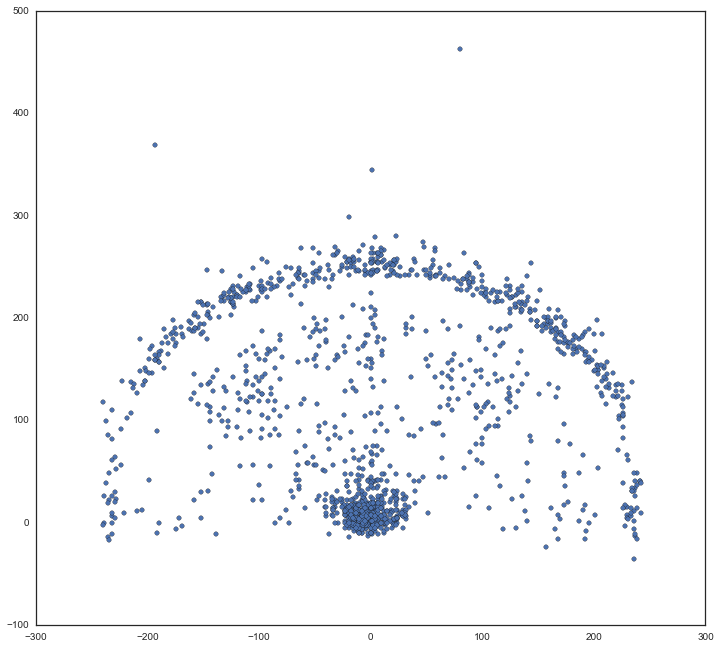

In [11]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(harden_shots_full.LOC_X, harden_shots_full.LOC_Y)
plt.show()

###Drawing NBA Court to Scale

In [12]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [16]:
harden_shots_full.iloc[0]

ACTION_TYPE                                  Jump Shot
EVENT_TYPE                                 Missed Shot
GAME_EVENT_ID                                       18
GAME_ID                                     0021400003
GRID_TYPE                            Shot Chart Detail
LOC_X                                              226
LOC_Y                                               39
MINUTES_REMAINING                                    9
PERIOD_x                                             1
PLAYER_ID_x                                     201935
PLAYER_NAME                               James Harden
SECONDS_REMAINING                                   58
SHOT_ATTEMPTED_FLAG                                  1
SHOT_DISTANCE                                       22
SHOT_MADE_FLAG                                       0
SHOT_TYPE                               3PT Field Goal
SHOT_ZONE_AREA                           Right Side(R)
SHOT_ZONE_BASIC                         Right Corner 3
SHOT_ZONE_

In [18]:
xy = (harden_shots_full.LOC_X[0],harden_shots_full.LOC_Y[0])
def_dist = harden_shots_full.CLOSE_DEF_DIST[0]*10
xy, def_dist

((226, 39), 66.0)

(422.5, -47.5)

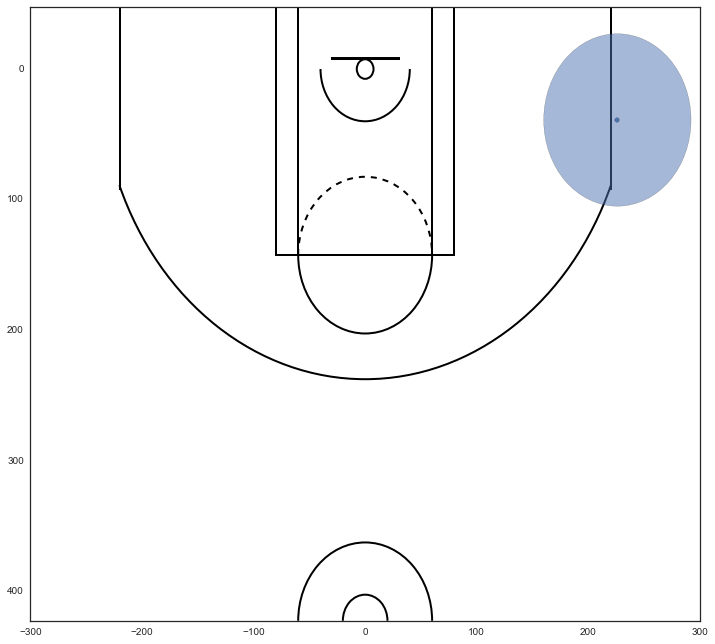

In [35]:
plt.figure(figsize=(12,11))
plt.scatter(harden_shots_full.LOC_X[0], harden_shots_full.LOC_Y[0])
draw_court()
defender = Circle(xy, def_dist, alpha=.5)
fig = plt.gcf()
fig.gca().add_artist(defender)

# Descending values along the axis from left to right
plt.xlim(-300,300)
plt.ylim(422.5, -47.5)

In [43]:
len(harden_shots_full)

1470

In [65]:
def draw_defender_radius(df, ax=None, alpha = .25):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
    for i in range(len(df)):
        defender = Circle((df.LOC_X[i],df.LOC_Y[i]), 
                          radius = df.CLOSE_DEF_DIST[i]*10, 
                          alpha = alpha)
        ax.add_patch(defender)
    return ax

In [52]:
def fancy_shotchart(df):
    plt.figure(figsize=(12,11))
    plt.scatter(df.LOC_X, df.LOC_Y)
    draw_court()
    draw_defender_radius(df)
    # Descending values along the axis from left to right
    plt.xlim(-300,300)
    plt.ylim(422.5, -47.5)

In [53]:
harden_game = harden_shots_full.ix[harden_shots.GAME_ID == '0021400003']

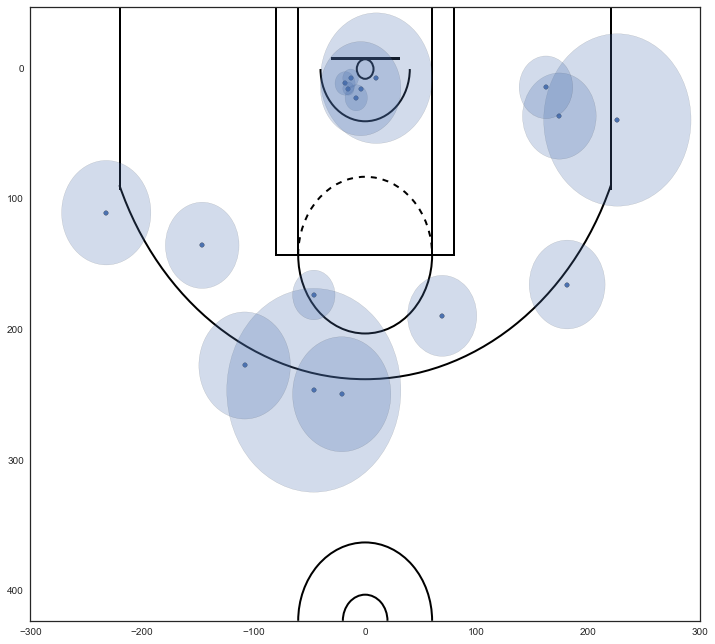

In [66]:
fancy_shotchart(harden_game)

(422.5, -47.5)

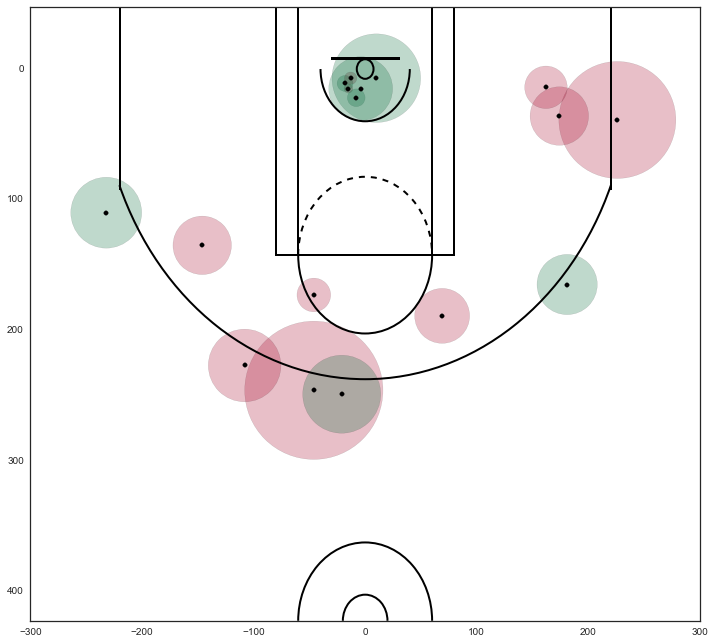

In [76]:
plt.figure(figsize=(12,11))
plt.scatter(harden_game.LOC_X, harden_game.LOC_Y,
            s=pi*(harden_game.CLOSE_DEF_DIST*10)**2,
            alpha = .25, c = harden_game.SHOT_MADE_FLAG,
            cmap = plt.cm.RdYlGn)
plt.scatter(harden_game.LOC_X, harden_game.LOC_Y, c='black')

draw_court()
# Descending values along the axis from left to right
plt.xlim(-300,300)
plt.ylim(422.5, -47.5)

In [77]:
def fancy_shots(df):
    plt.figure(figsize=(12,11))
    plt.scatter(df.LOC_X, df.LOC_Y,
            s=pi*(df.CLOSE_DEF_DIST*10)**2,
            alpha = .25, c = df.SHOT_MADE_FLAG,
            cmap = plt.cm.RdYlGn)
    plt.scatter(df.LOC_X, df.LOC_Y, c='black')

    draw_court()
    # Descending values along the axis from left to right
    plt.xlim(-300,300)
    plt.ylim(422.5, -47.5)

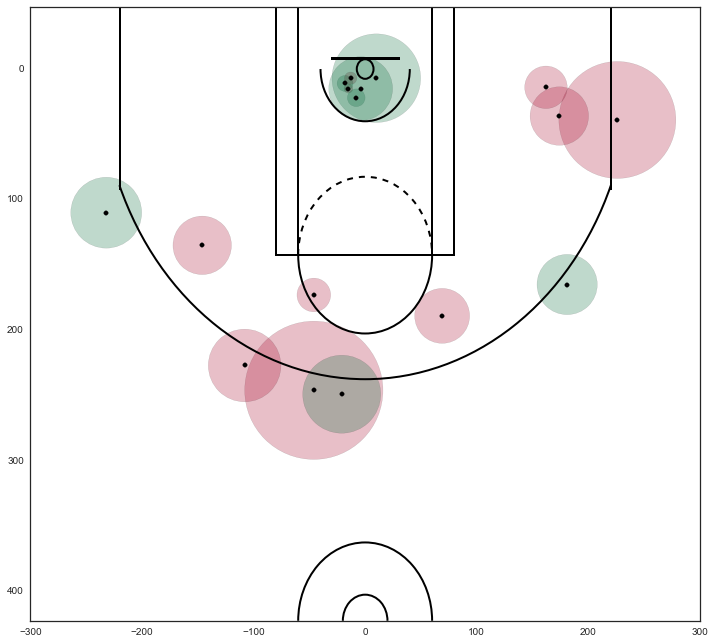

In [79]:
fancy_shots(harden_shots_full.ix[harden_shots.GAME_ID == '0021400003'])

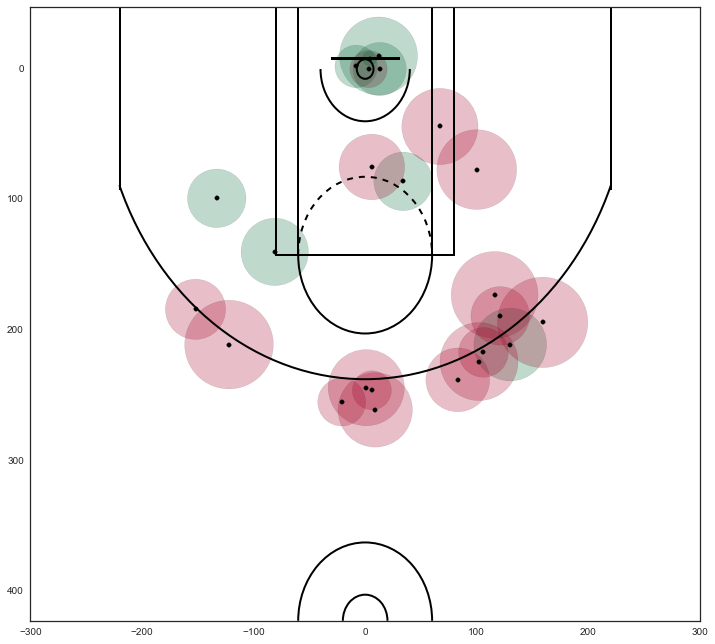

In [82]:
fancy_shots(harden_shots_full.ix[harden_shots.GAME_ID == '0021400087'])

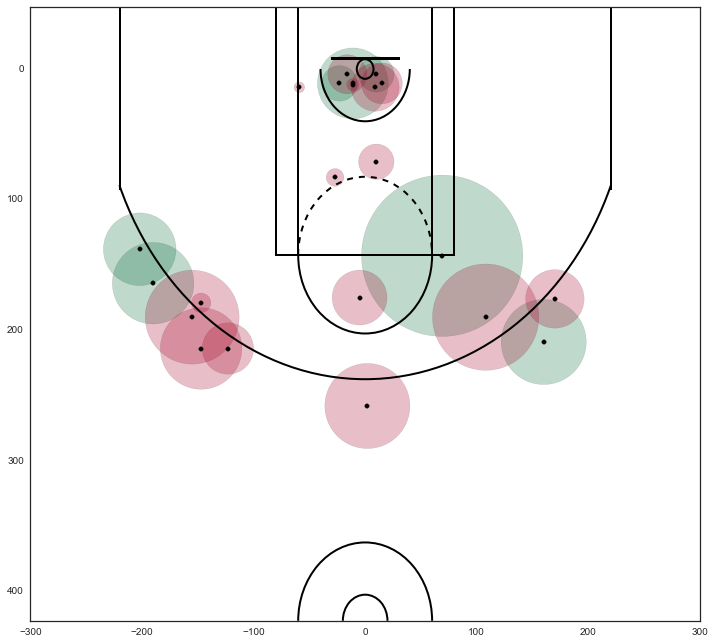

In [83]:
fancy_shots(harden_shots_full.ix[harden_shots.GAME_ID == '0021400512'])

In [80]:
set(harden_shots_full.GAME_ID.values.tolist())

{u'0021400003',
 u'0021400012',
 u'0021400034',
 u'0021400043',
 u'0021400050',
 u'0021400069',
 u'0021400087',
 u'0021400117',
 u'0021400127',
 u'0021400144',
 u'0021400151',
 u'0021400169',
 u'0021400188',
 u'0021400202',
 u'0021400217',
 u'0021400228',
 u'0021400240',
 u'0021400268',
 u'0021400283',
 u'0021400290',
 u'0021400324',
 u'0021400327',
 u'0021400346',
 u'0021400378',
 u'0021400380',
 u'0021400396',
 u'0021400411',
 u'0021400436',
 u'0021400454',
 u'0021400463',
 u'0021400478',
 u'0021400488',
 u'0021400497',
 u'0021400512',
 u'0021400523',
 u'0021400536',
 u'0021400555',
 u'0021400564',
 u'0021400575',
 u'0021400584',
 u'0021400603',
 u'0021400617',
 u'0021400636',
 u'0021400650',
 u'0021400667',
 u'0021400685',
 u'0021400698',
 u'0021400709',
 u'0021400735',
 u'0021400753',
 u'0021400771',
 u'0021400784',
 u'0021400799',
 u'0021400810',
 u'0021400819',
 u'0021400832',
 u'0021400846',
 u'0021400863',
 u'0021400883',
 u'0021400901',
 u'0021400917',
 u'0021400930',
 u'00214